# 🎓 Aula 1: Introdução aos principais conceitos de modelos preditivos.

---

## 📋 Índice

1. [Problema de Classificação](#classificação)
   - Geração de Dados Sintéticos
   - Visualização e Exploração
   - Treino e Avaliação de Modelo KNN
   - Análise de Overfitting
2. [Problema de Regressão](#regressão)
   - Carregamento e Exploração de Dados
   - Pré-processamento (Normalização e One-Hot Encoding)
   - Treino e Avaliação de Regressão Linear

---

## 🎯 Objetivos de Aprendizagem

Ao completares este notebook serás capaz de:

1. **Compreender** a diferença entre problemas de classificação e regressão
2. **Aplicar** treinar o teu primeiro modelo de Machine Learning
3. **Interpretar** métricas de avaliação (matriz de confusão, precision, recall, MAE)
4. **Reconhecer** sinais de overfitting comparando performance em treino vs. teste
5. **Praticar** técnicas de pré-processamento: normalização e one-hot encoding

---

## 📚 Pré-requisitos

Antes de começar, certifica-te de que você:
- Tens conhecimento básico de Python e pandas
- Entendes conceitos básicos de estatística (média, desvio padrão)
- Estás familiarizado com o ambiente Google Colab
- Compreendes a diferença entre variáveis categóricas e numéricas

---

## 💾 Configuração Inicial

Executa a célula abaixo para garantir que todas as bibliotecas necessárias estão disponíveis. Se alguma importação falhar, use `!pip install nome_da_biblioteca` para instalar.


# <a name="classificação"></a> 📊 Problema de Classificação

## Parte 1: Geração e Visualização de Dados Sintéticos

### 🎓 Conceito: Dados Sintéticos para Aprendizagem

Em machine learning, muitas vezes começamos com **dados sintéticos** (gerados artificialmente) porque:
- São simples e fáceis de visualizar
- Permitem focar nos conceitos sem distrações de dados reais complexos
- Garantem que sabemos a "verdade" sobre os dados (ground truth)

> **Key Insight:** Dados sintéticos são uma ferramenta pedagógica poderosa. Eles permitem-nos entender como os algoritmos funcionam antes de lidar com a complexidade e ruído dos dados reais.

### 📝 O que vamos fazer nesta célula:

1. **Importar bibliotecas** essenciais para machine learning e visualização
2. **Gerar dados sintéticos** usando `make_blobs` do scikit-learn
3. **Visualizar os dados** num gráfico de dispersão 2D

### ⚠️ Atenção Especial:

- `make_blobs` cria "nuvens" de pontos (clusters) separados
- Cada ponto pertence a uma classe (0 ou 1)
- `random_state=0` garante resultados reproduzíveis

### 🤔 Antes de executares, pensa:

- Quantas classes esperas ver no gráfico?
- Como é que os pontos das diferentes classes devem estar distribuídos?

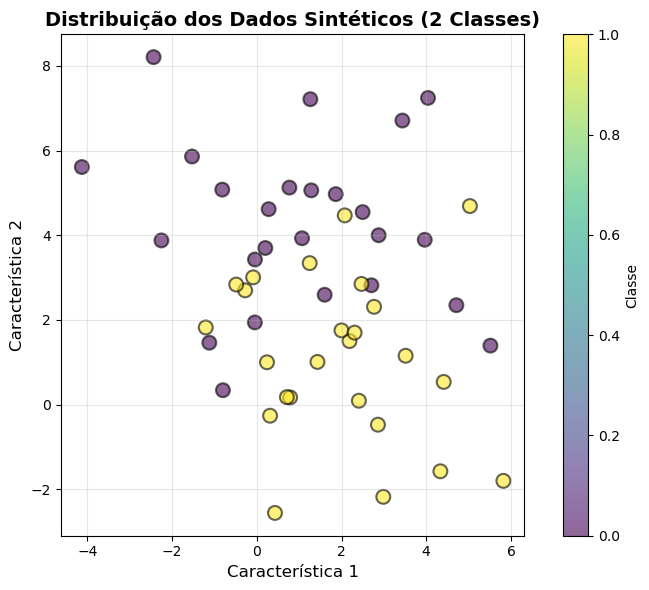

In [ ]:
# ============================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================================
# sklearn: Biblioteca principal para machine learning em Python
#   - make_blobs: Gera dados sintéticos em formato de clusters
# numpy: Operações numéricas eficientes (arrays multidimensionais)
# matplotlib: Visualização de dados (gráficos e plots)
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# ============================================================================
# GERAÇÃO DE DADOS SINTÉTICOS
# ============================================================================
# make_blobs cria pontos agrupados em "nuvens" (blobs)
# Parâmetros importantes:
#   - centers=2: Cria 2 grupos distintos (2 classes)
#   - cluster_std=2: Desvio padrão dos clusters (quanto maior, mais espalhados)
#   - n_samples=50: Total de pontos gerados (25 por classe)
#   - random_state=0: Semente aleatória para reprodutibilidade
#
# Retorna:
#   - X: Array (50, 2) com as coordenadas dos pontos [variáveis explicativas]
#   - y: Array (50,) com as classes (0 ou 1) [variável target/objetivo]
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)

# ============================================================================
# VISUALIZAÇÃO DOS DADOS
# ============================================================================
# Criar figura para o gráfico
plt.figure(figsize=(8, 6))
plt.gca().set_aspect("equal")  # Eixos com mesma escala (importante para distâncias)

# scatter: Gráfico de dispersão
#   - X[:, 0]: Primeira coordenada (eixo x)
#   - X[:, 1]: Segunda coordenada (eixo y)
#   - c=y: Cores baseadas nas classes (0=azul, 1=laranja por padrão)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=0.6, edgecolors='black', linewidth=1.5)
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)
plt.title('Distribuição dos Dados Sintéticos (2 Classes)', fontsize=14, fontweight='bold')
plt.colorbar(label='Classe')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 📊 OBSERVAÇÃO: Nota como os pontos formam dois grupos distintos.
#    Isso facilita a tarefa de classificação visto que um algoritmo deve conseguir
#    separar essas duas classes com relativa facilidade.

### 🔍 Checkpoint: Explorando a Estrutura dos Dados

Agora vamos **inspecionar** a estrutura dos dados que acabamos de gerar. Isso é uma prática essencial em qualquer projeto de ML!

> **Key Insight:** Verifica sempre a forma (shape) dos dados antes de os processares. Isso evita erros comuns de dimensões incompatíveis.

**O que esperamos ver:**
- `X.shape` deve retornar `(50, 2)` → 50 amostras, 2 características
- `y.shape` deve retornar `(50,)` → 50 labels correspondentes

In [2]:
# ============================================================================
# VERIFICAÇÃO DA ESTRUTURA DOS DADOS
# ============================================================================
# .shape retorna (número_de_linhas, número_de_colunas)
# Para X: esperamos (50, 2) → 50 amostras, 2 características
print("Forma da matriz X (variáveis explicativas):")
print(f"  X.shape = {X.shape}")
print(f"  → {X.shape[0]} amostras, {X.shape[1]} características\n")

print("Forma do vetor y (variável target):")
print(f"  y.shape = {y.shape}")
print(f"  → {y.shape[0]} labels\n")

# Verificação importante: número de amostras deve coincidir!
assert X.shape[0] == y.shape[0], "ERRO: Número de amostras em X e y não coincide!"
print("✅ Estrutura dos dados está correta!")

Forma da matriz X (variáveis explicativas):
  X.shape = (50, 2)
  → 50 amostras, 2 características

Forma do vetor y (variável target):
  y.shape = (50,)
  → 50 labels

✅ Estrutura dos dados está correta!


### 📊 Exploração Opcional: Valores dos Dados

Executa a célula abaixo se quiser ver os **valores reais** das coordenadas. Isso ajuda a entender como os dados estão distribuídos numericamente.

In [3]:
# Visualizar os primeiros 10 pontos e estatísticas básicas
print("Primeiros 10 pontos (amostras):")
print(X[:10])
print("\n" + "="*50)
print("Estatísticas descritivas:")
print(f"Média das características: {X.mean(axis=0)}")
print(f"Desvio padrão: {X.std(axis=0)}")
print(f"Valor mínimo: {X.min(axis=0)}")
print(f"Valor máximo: {X.max(axis=0)}")

Primeiros 10 pontos (amostras):
[[-0.08623772  3.00656711]
 [ 1.24891363  3.3425538 ]
 [ 2.49834553  4.54713736]
 [ 3.96442822  3.8934708 ]
 [ 2.18830197  1.50260746]
 [ 4.33406889 -1.57198798]
 [ 5.82156892 -1.79785446]
 [ 2.07626756  4.46940465]
 [ 1.99890306  1.7543274 ]
 [-2.4362703   8.20533812]]

Estatísticas descritivas:
Média das características: [1.46417614 2.68556872]
Desvio padrão: [2.1307283  2.47030635]
Valor mínimo: [-4.12970955 -2.55490154]
Valor máximo: [5.82156892 8.20533812]


### 🏷️ Explorando as Labels (Classes)

Agora vamos ver as **classes** (labels) de cada ponto. Em problemas de classificação, estas são as respostas que queremos prever.

> **Key Insight:** Em machine learning supervisionado, temos acesso às labels durante o treino, mas o modelo deve aprender a prever labels para novos dados que nunca viu.

In [4]:
# ============================================================================
# EXPLORAÇÃO DAS LABELS (CLASSES)
# ============================================================================
# y contém as classes verdadeiras para cada amostra
print("Primeiras 15 labels:")
print(y[:15])
print("\n" + "="*50)
print("Distribuição das classes:")
unique, counts = np.unique(y, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Classe {cls}: {count} amostras ({count/len(y)*100:.1f}%)")

print(f"\nTotal de classes únicas: {len(unique)}")
print(f"Classes: {unique}")

Primeiras 15 labels:
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0]

Distribuição das classes:
  Classe 0: 25 amostras (50.0%)
  Classe 1: 25 amostras (50.0%)

Total de classes únicas: 2
Classes: [0 1]


### 🧪 Exploração Interativa

Agora vamos experimentar com diferentes valores de K para ver como isso afeta a performance do modelo!

> **💡 Experimenta:** Altera o valor de `n_neighbors` abaixo e observe como a métrica **accuracy** muda. Valores maiores de K tendem a ser mais estáveis mas podem perder detalhes locais.


In [ ]:
# ============================================================================
# TESTANDO DIFERENTES VALORES DE K
# ============================================================================
# @title Experimente diferentes valores de K
n_neighbors = 3  # @param {type:"slider", min:1, max:15, step:1}

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Treinar modelo com K escolhido
knn_exp = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_exp.fit(X_train, y_train)

# Avaliar
y_pred_train_exp = knn_exp.predict(X_train)
y_pred_test_exp = knn_exp.predict(X_test)

acc_train_exp = accuracy_score(y_train, y_pred_train_exp)
acc_test_exp = accuracy_score(y_test, y_pred_test_exp)

print(f"K = {n_neighbors}")
print(f"Accuracy no Treino:  {acc_train_exp:.3f} ({acc_train_exp*100:.1f}%)")
print(f"Accuracy no Teste:   {acc_test_exp:.3f} ({acc_test_exp*100:.1f}%)")
print(f"Diferença:           {acc_train_exp - acc_test_exp:.3f}")

# Visualização da fronteira de decisão (opcional, apenas para visualização 2D)
if X.shape[1] == 2:
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    h = 0.02  # passo da malha
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = knn_exp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, 
                edgecolors='black', linewidth=1.5, cmap=plt.cm.RdYlBu, label='Treino')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, marker='^',
                edgecolors='black', linewidth=1.5, cmap=plt.cm.RdYlBu, label='Teste')
    plt.xlabel('Característica 1', fontsize=12)
    plt.ylabel('Característica 2', fontsize=12)
    plt.title(f'Fronteira de Decisão - KNN com K={n_neighbors}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Observe como a fronteira de decisão muda com diferentes valores de K!")


NameError: name 'X_train' is not defined

## Parte 2: Treino e Avaliação do Modelo KNN

### 🎓 Conceito: Divisão Treino/Teste

**Porque devemos dividir os dados?**

Em machine learning, nunca avaliamos o modelo com os mesmos dados utilizados para treinar o modelo. Isso seria como fazer um exame com as mesmas perguntas que estudaste!

- **Conjunto de Treino (75%)**: Dados usados para "ensinar" o modelo
- **Conjunto de Teste (25%)**: Dados usados para avaliar se o modelo generaliza bem

> **Key Insight:** A divisão treino/teste simula a situação real: o modelo aprende com dados históricos e deve prever corretamente dados novos que nunca viu.

### 🎓 Conceito: K-Nearest Neighbors (KNN)

**Como funciona o KNN?**

1. Para classificar um novo ponto, o algoritmo encontra os **K pontos mais próximos** no conjunto de treino
2. A classe do novo ponto é determinada pela **votação** das classes dos K vizinhos mais próximos
3. Com `n_neighbors=1`, usamos apenas o vizinho mais próximo (mais simples, mas pode ser instável)

### 📊 Métricas de Avaliação

Vamos usar três ferramentas para avaliar o modelo:

1. **Matriz de Confusão**: Permite visualisar as previsões corretas e erradas por classe
2. **Classification Report**: Resume a precision, o recall, o f1-score e a accuracy

### 🤔 Antes de executar, pensa:

- Qual a accuracy que esperas? (Lembra-te: temos 2 classes bem separadas)
- O que significa o precision e o recall?
- Porque precisamos da matriz de confusão?

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



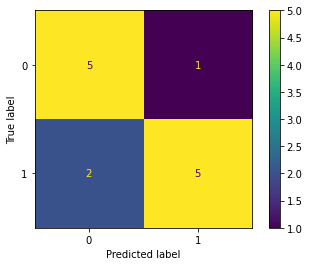

In [ ]:
# ============================================================================
# IMPORTAÇÕES NECESSÁRIAS
# ============================================================================
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ============================================================================
# DIVISÃO TREINO/TESTE
# ============================================================================
# train_test_split: Divide os dados aleatoriamente em dois conjuntos
# Parâmetros importantes:
#   - test_size=0.25: 25% dos dados vão para teste (75% para treino)
#   - random_state: Garante que a divisão é reproduzível
#   - shuffle=True (padrão): Embaralha os dados antes de dividir
#
# ⚠️ ATENÇÃO: random_state garante resultados reproduzíveis. 
#    Sem ele, cada execução pode dar resultados diferentes!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,  # Adicionado para reprodutibilidade
    stratify=y  # Mantém proporção de classes em treino e teste
)

print("Divisão dos dados:")
print(f"  Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print()

# ============================================================================
# TREINO DO MODELO KNN
# ============================================================================
# KNeighborsClassifier: Algoritmo de classificação baseado em distâncias
# Parâmetro chave:
#   - n_neighbors=1: Usa apenas o vizinho mais próximo
#     (K=1 é simples mas pode ser muito sensível a ruído)
#
# ⚠️ ATENÇÃO: K=1 significa que cada ponto é classificado exatamente
#    como seu vizinho mais próximo. Isso pode levar a overfitting!
knn = KNeighborsClassifier(n_neighbors=1)

# .fit(): Treina o modelo com os dados de treino
#   - X_train: características (features)
#   - y_train: labels verdadeiras (ground truth)
#   O modelo "aprende" a relação entre X e y
print("Treinando modelo KNN (K=1)...")
knn.fit(X_train, y_train)
print("✅ Modelo treinado!\n")

# ============================================================================
# PREVISÕES NO CONJUNTO DE TESTE
# ============================================================================
# .predict(): Faz previsões para novos dados
#   - X_test: características do conjunto de teste
#   - Retorna: y_pred (previsões do modelo)
#   ⚠️ IMPORTANTE: O modelo NÃO vê y_test durante a previsão!
y_pred = knn.predict(X_test)

print(f"Previsões realizadas: {len(y_pred)} amostras\n")

# ============================================================================
# AVALIAÇÃO DO MODELO: MATRIZ DE CONFUSÃO
# ============================================================================
# Matriz de Confusão: Tabela que mostra acertos e erros
#   - Diagonal principal: previsões corretas
#   - Fora da diagonal: erros de classificação
#   - Útil para entender QUAIS classes são confundidas
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Conjunto de Teste', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# AVALIAÇÃO DO MODELO: RELATÓRIO DE CLASSIFICAÇÃO
# ============================================================================
# Classification Report: Resumo de métricas importantes
#   - Precision: Dos que previ como classe X, quantos eram realmente X?
#   - Recall: De todos os que são classe X, quantos consegui identificar?
#   - F1-score: Média harmônica de precision e recall
#   - Support: Número de amostras de cada classe no teste
print("="*60)
print("RELATÓRIO DE CLASSIFICAÇÃO - Conjunto de Teste")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Classe 0', 'Classe 1']))
print("="*60)

### 🔍 Checkpoint: Comparando Performance em Treino vs. Teste

Agora vamos avaliar o modelo no **conjunto de treino** (os dados que ele já viu). Isso é crucial para detectar **overfitting**!

> **Key Insight:** Overfitting ocorre quando o modelo "decora" os dados de treino mas não generaliza bem para novos dados. Um sinal clássico é accuracy muito alta no treino mas baixa no teste.

### 🤔 Antes de executar, pensa:

- Esperas que a accuracy no treino seja maior, menor ou igual à do teste? Por quê?
- Se a accuracy no treino for 100% mas no teste for 70%, o que isso indica?
- Com K=1, o que esperas ver no conjunto de treino?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



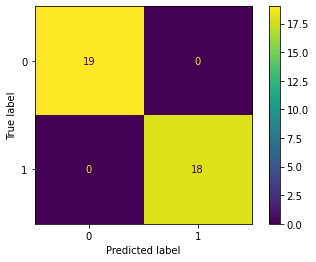

In [ ]:
# ============================================================================
# AVALIAÇÃO NO CONJUNTO DE TREINO
# ============================================================================
# ⚠️ ATENÇÃO: Esta avaliação é apenas para comparação educacional!
#    Em projetos reais, focamos na performance no conjunto de teste.
y_pred_train = knn.predict(X_train)

# Matriz de confusão no treino
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train.plot(cmap='Greens', values_format='d')
plt.title('Matriz de Confusão - Conjunto de Treino', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Relatório de classificação no treino
print("="*60)
print("RELATÓRIO DE CLASSIFICAÇÃO - Conjunto de Treino")
print("="*60)
print(classification_report(y_train, y_pred_train, target_names=['Classe 0', 'Classe 1']))
print("="*60)

# ============================================================================
# COMPARAÇÃO: TREINO vs. TESTE
# ============================================================================
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred)

print("\n" + "="*60)
print("COMPARAÇÃO DE PERFORMANCE")
print("="*60)
print(f"Accuracy no Treino:  {acc_train:.3f} ({acc_train*100:.1f}%)")
print(f"Accuracy no Teste:   {acc_test:.3f} ({acc_test*100:.1f}%)")
print(f"Diferença:           {acc_train - acc_test:.3f} ({abs(acc_train - acc_test)*100:.1f} pontos percentuais)")

if acc_train > acc_test + 0.1:  # Diferença maior que 10%
    print("\n⚠️  ATENÇÃO: Grande diferença detectada!")
    print("   Isso pode indicar overfitting - o modelo 'decorou' os dados de treino.")
    print("   Soluções possíveis: aumentar K, usar mais dados, ou regularização.")
elif abs(acc_train - acc_test) < 0.05:
    print("\n✅ Performance similar em treino e teste.")
    print("   O modelo parece estar generalizando bem!")
else:
    print("\n📊 Diferença moderada entre treino e teste.")
print("="*60)

---

# <a name="regressão"></a> 📈 Problema de Regressão

## Introdução: Classificação vs. Regressão

Até agora trabalhamos com **classificação** (prever classes discretas: 0 ou 1). Agora vamos trabalhar com a **regressão** (prever valores numéricos contínuos).

### 🎓 Diferenças Principais:

| Aspecto | Classificação | Regressão |
|---------|--------------|-----------|
| **Output** | Classes discretas (0, 1, 2...) | Valores contínuos (1.5, 3.7, 10.2...) |
| **Exemplo** | "É um gato ou cão?" | "Qual o preço desta casa?" |
| **Métricas** | Accuracy, Precision, Recall | MAE, RMSE, R² |
| **Algoritmos** | KNN, Árvores de Decisão | Regressão Linear, Random Forest |

### 📊 Dataset: Abalone

Vamos utilizar o dataset **Abalone** (búzios), que contém características físicas de moluscos e o objetivo é prever o número de anéis (relacionado com a idade).

> **Key Insight:** Em regressão, não classificamos em categorias, mas estimamos um valor numérico. A avaliação mede o "erro" entre valores previstos e reais.

---

## Parte 1: Carregamento e Exploração de Dados

### 📁 Passo 1: Carregar o Dataset

**Instruções:**
1. Executa a célula abaixo
2. Seleciona "Choose Files" ou "Escolher Ficheiros"
3. Selecione o ficheiro `abalone.csv` do seu computador
4. Aguarda a confirmação do upload

> **💡 Dica:** Se o ficheiro já estiver no Colab, podes comentar o código de upload e usar `pd.read_csv('abalone.csv')` diretamente.

### ⚠️ Importante:
- Sem este passo, as células seguintes não funcionarão
- O ficheiro será salvo temporariamente no ambiente do Colab
- Se desconectares a sessão, precisarás de fazer upload novamente

In [ ]:
# ============================================================================
# CARREGAMENTO DE FICHEIRO NO GOOGLE COLAB
# ============================================================================
# files.upload(): Abre uma interface para selecionar ficheiro do computador
#   - Funciona apenas no Google Colab
#   - Para Jupyter local, use: df = pd.read_csv('caminho/para/abalone.csv')
from google.colab import files

print("📁 Por favor, selecione o ficheiro 'abalone.csv'")
print("   (Se já estiver no Colab, pode comentar esta célula e usar pd.read_csv diretamente)\n")
uploaded = files.upload()

# Verificar se o upload foi bem-sucedido
if 'abalone.csv' in uploaded:
    print(f"✅ Ficheiro carregado com sucesso! Tamanho: {len(uploaded['abalone.csv'])} bytes")
else:
    print("⚠️  Ficheiro 'abalone.csv' não encontrado. Verifique o nome do ficheiro.")

Saving abalone.csv to abalone.csv


### 📖 Passo 2: Ler o Dataset para um DataFrame

Agora vamos converter o ficheiro carregado em um **DataFrame do pandas**, que é a estrutura de dados mais comum para trabalhar com dados tabulares em Python.

In [ ]:
# ============================================================================
# IMPORTAÇÕES E LEITURA DO DATASET
# ============================================================================
import io
import pandas as pd
import numpy as np

# pd.read_csv(): Lê ficheiro CSV e cria um DataFrame
#   - io.BytesIO(): Converte os bytes do upload em um objeto que o pandas pode ler
#   - DataFrame: Estrutura tabular (como uma planilha Excel) com linhas e colunas
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

print("✅ Dataset carregado com sucesso!")
print(f"\nPrimeiras linhas do dataset:")
print(df.head())
print(f"\n📊 Informação geral:")
print(f"   Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"   Nome das colunas: {list(df.columns)}")

### 🔍 Checkpoint: Explorando a Estrutura do Dataset

Antes de processar os dados, pensa:
- **Tamanho**: Quantas amostras e features temos?
- **Tipos de dados**: Quais são as features numéricas? Quais são as categóricas?
- **Valores ausentes**: Temos dados em falta?

> **Key Insight:** A exploração inicial (EDA - Exploratory Data Analysis) é crucial. Ela permite revelar problemas que precisam ser resolvidos antes de treinar modelos.

In [ ]:
# ============================================================================
# DIMENSÕES DO DATASET
# ============================================================================
print("Dimensões do dataset:")
print(f"  (linhas, colunas) = {df.shape}")
print(f"  → {df.shape[0]} amostras")
print(f"  → {df.shape[1]} características\n")

# Verificar valores ausentes
missing = df.isnull().sum()
if missing.sum() > 0:
    print("⚠️  Valores ausentes encontrados:")
    print(missing[missing > 0])
else:
    print("✅ Nenhum valor ausente encontrado!")

(4177, 9)

In [ ]:
# ============================================================================
# TIPOS DE DADOS
# ============================================================================
print("Tipos de dados por coluna:")
print(df.dtypes)
print("\n" + "="*50)

# Separar variáveis numéricas e categóricas
numerics = ['float64', 'int64']
num_vars = df.select_dtypes(include=numerics).columns.tolist()
cat_vars = df.select_dtypes(include='object').columns.tolist()

print(f"\nVariáveis numéricas ({len(num_vars)}):")
for var in num_vars:
    print(f"  - {var} ({df[var].dtype})")

if cat_vars:
    print(f"\nVariáveis categóricas ({len(cat_vars)}):")
    for var in cat_vars:
        print(f"  - {var} ({df[var].dtype})")
        print(f"    Valores únicos: {df[var].nunique()} → {df[var].unique()[:5].tolist()}")
else:
    print("\n✅ Nenhuma variável categórica encontrada.")

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

## Parte 2: Pré-processamento dos Dados

### 🎓 Conceito: Por que Pré-processar?

Dados brutos raramente estão prontos para machine learning. Precisamos:

1. **Normalizar variáveis numéricas**: Colocar todas na mesma escala (ex: 0-1 ou média=0, desvio=1)
   - **Porquê?** Algoritmos baseados em distâncias (como KNN) são sensíveis à escala
   - **Exemplo**: Se uma variável está em metros (0-10) e outra em gramas (0-1000), a segunda dominará os cálculos

2. **One-Hot Encoding de variáveis categóricas**: Converter categorias em números binários
   - **Porquê?** Algoritmos matemáticos não entendem texto ("M", "F", "I")
   - **Como?** Cada categoria vira uma coluna binária (0 ou 1)

> **Key Insight:** Pré-processamento é tão importante quanto escolher o algoritmo certo. Garbage in garbage out, independente do algoritmo.

### 🤔 Antes de executar, pensa:

- Porque não podemos utilizar features categóricas diretamente?
- O que acontece se não normalizarmos as features com escalas muito diferentes?

In [ ]:
# ============================================================================
# IMPORTAÇÕES PARA PRÉ-PROCESSAMENTO
# ============================================================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ============================================================================
# IDENTIFICAÇÃO DE VARIÁVEIS
# ============================================================================
# Separar variáveis numéricas e categóricas
#   - 'Rings' é a variável target (o que queremos prever), então a excluímos
numerics = ['float64', 'int64']
num_vars = df.select_dtypes(include=numerics).columns.difference(['Rings'])
cat_vars = df.select_dtypes(include='object').columns

print("Variáveis identificadas:")
print(f"  Numéricas: {list(num_vars)}")
print(f"  Categóricas: {list(cat_vars)}")
print(f"  Target: Rings\n")

# ============================================================================
# NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS
# ============================================================================
# StandardScaler: Normaliza para média=0 e desvio padrão=1
#   - fit_transform(): Calcula média/desvio dos dados de treino E aplica transformação
#   - Por que normalizar? Variáveis com escalas diferentes podem dominar o modelo
#
# ⚠️ ATENÇÃO: Em projetos reais, você deve:
#   1. fit() apenas nos dados de treino
#   2. transform() nos dados de treino E teste
#   3. Nunca fit() nos dados de teste! (data leakage)
scaler = StandardScaler()
X_num = scaler.fit_transform(df[num_vars])

print("Normalização aplicada às variáveis numéricas:")
print(f"  Forma: {X_num.shape}")
print(f"  Média (deve ser ~0): {X_num.mean(axis=0)[:3]}...")  # Primeiras 3
print(f"  Desvio padrão (deve ser ~1): {X_num.std(axis=0)[:3]}...\n")

# ============================================================================
# ONE-HOT ENCODING DE VARIÁVEIS CATEGÓRICAS
# ============================================================================
# OneHotEncoder: Converte categorias em colunas binárias
#   Exemplo: Sexo ['M', 'F', 'I'] → 3 colunas: [1,0,0], [0,1,0], [0,0,1]
#   - sparse_output=False: Retorna array numpy denso (não esparso)
#
# ⚠️ ATENÇÃO: One-hot encoding aumenta o número de colunas!
#    Se tiver 1 variável categórica com 3 valores → 3 colunas
enc = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' evita multicolinearidade
X_cat = enc.fit_transform(df[cat_vars])

print("One-hot encoding aplicado às variáveis categóricas:")
print(f"  Forma: {X_cat.shape}")
print(f"  Categorias originais: {list(cat_vars)}")
if len(cat_vars) > 0:
    print(f"  Nomes das novas colunas: {enc.get_feature_names_out(cat_vars.tolist())}\n")

# ============================================================================
# CONCATENAÇÃO: JUNTAR VARIÁVEIS NUMÉRICAS E CATEGÓRICAS PROCESSADAS
# ============================================================================
# np.concatenate(): Junta arrays ao longo do eixo especificado
#   - axis=1: Concatena colunas (horizontalmente)
#   - axis=0: Concatena linhas (verticalmente)
X_processed = np.concatenate([X_num, X_cat], axis=1)

print("="*60)
print("PRÉ-PROCESSAMENTO CONCLUÍDO")
print("="*60)
print(f"Forma final de X_processed: {X_processed.shape}")
print(f"  → {X_processed.shape[0]} amostras")
print(f"  → {X_processed.shape[1]} características (após processamento)")
print("="*60)

### ✅ Verificação: Dimensões Após Pré-processamento

Executa a célula abaixo para confirmar que o pré-processamento foi aplicado corretamente. Denota como o número de colunas aumentou devido ao one-hot encoding!

In [ ]:
# Verificação final da estrutura
print("Estrutura dos dados processados:")
print(f"  X_processed.shape = {X_processed.shape}")
print(f"\nComparação:")
print(f"  Colunas originais (numéricas): {len(num_vars)}")
print(f"  Colunas após one-hot: {X_cat.shape[1] if len(cat_vars) > 0 else 0}")
print(f"  Total de colunas processadas: {X_processed.shape[1]}")
print(f"\n✅ Dados prontos para treino do modelo!")

(4177, 10)

## Parte 3: Treino e Avaliação do Modelo

### 📊 Divisão Treino/Teste

Agora vamos dividir os dados processados em conjuntos de treino e teste, assim como fizemos no problema de classificação.

In [ ]:
# ============================================================================
# DIVISÃO TREINO/TESTE
# ============================================================================
from sklearn.model_selection import train_test_split

# Dividir dados processados e target
#   - X_processed: características já normalizadas e codificadas
#   - df['Rings']: variável target (número de anéis = idade)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    df['Rings'], 
    test_size=0.25,
    random_state=42  # Reprodutibilidade
)

print("Divisão dos dados:")
print(f"  Treino: {X_train.shape[0]} amostras")
print(f"  Teste:  {X_test.shape[0]} amostras")
print(f"\nEstatísticas do target (Rings):")
print(f"  Treino - Média: {y_train.mean():.2f}, Desvio: {y_train.std():.2f}")
print(f"  Teste  - Média: {y_test.mean():.2f}, Desvio: {y_test.std():.2f}")

### 🎓 Conceito: Regressão Linear

**O que é Regressão Linear?**

É um algoritmo que encontra a "melhor linha" (ou hiperplano em múltiplas dimensões) que relaciona as características (X) com o target (y).

- **Fórmula simples**: `y = a*x + b` (onde `a` é o coeficiente e `b` é o intercepto). No secundário esta fórmula é conhecida como a equação da reta.
- **Objetivo**: Minimizar o erro entre valores previstos e reais
- **Vantagens**: Simples, interpretável, rápido
- **Limitações**: Assume relação linear (pode não capturar padrões complexos)

### 📊 Métricas de Regressão

Diferente de classificação, em regressão medimos **erro**:

- **MAE (Mean Absolute Error)**: Erro médio absoluto
  - Exemplo: Se prevermos 10 e o valor real é 12, o erro é |12-10| = 2
  - Interpretação: "Em média, erramos X unidades"

> **Key Insight:** Na regressão, queremos minimizar o erro. Quanto menor o MAE, melhor o modelo.

### 🤔 Antes de executar, pensa:

- O que significa um MAE de 1.5 no contexto deste problema?
- Porque não utilizamos a accuracy na regressão?

In [ ]:
# ============================================================================
# TREINO DO MODELO DE REGRESSÃO LINEAR
# ============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# LinearRegression: Algoritmo de regressão linear
#   - Encontra os coeficientes que minimizam o erro quadrático
#   - Não precisa de hiperparâmetros (diferente de KNN)
reg = LinearRegression()

# Treinar o modelo
print("Treinando modelo de Regressão Linear...")
reg.fit(X_train, y_train)
print("✅ Modelo treinado!\n")

# ============================================================================
# PREVISÕES NO CONJUNTO DE TESTE
# ============================================================================
y_pred = reg.predict(X_test)

print(f"Previsões realizadas: {len(y_pred)} amostras")
print(f"Exemplo de previsões (primeiras 5):")
for i in range(min(5, len(y_pred))):
    print(f"  Real: {y_test.iloc[i]:.2f}, Previsto: {y_pred[i]:.2f}, Erro: {abs(y_test.iloc[i] - y_pred[i]):.2f}")

# ============================================================================
# AVALIAÇÃO DO MODELO: MÉTRICAS DE REGRESSÃO
# ============================================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\n" + "="*60)
print("MÉTRICAS DE AVALIAÇÃO - Conjunto de Teste")
print("="*60)
print(f"MAE  (Mean Absolute Error):  {mae:.3f}")
print(f"     → Em média, erramos {mae:.2f} anéis por previsão")
print(f"\nRMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"     → Penaliza mais erros grandes")
print(f"\nR²   (Coefficient of Determination): {r2:.3f}")
print(f"     → {r2*100:.1f}% da variância é explicada pelo modelo")
print(f"     → Quanto mais próximo de 1, melhor (máximo = 1.0)")
print("="*60)

# ============================================================================
# VISUALIZAÇÃO: VALORES REAIS vs. PREVISTOS
# ============================================================================
plt.figure(figsize=(10, 6))

# Gráfico de dispersão: valores reais vs. previstos
plt.scatter(y_test, y_pred, alpha=0.6, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Previsão Perfeita')
plt.xlabel('Valores Reais (Rings)', fontsize=12)
plt.ylabel('Valores Previstos (Rings)', fontsize=12)
plt.title('Valores Reais vs. Previstos - Regressão Linear', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretação do gráfico:
#   - Pontos próximos da linha vermelha = boas previsões
#   - Pontos distantes = erros maiores
#   - Padrões sistemáticos (curva) = modelo pode estar subajustado

1.5782504141372269

---

## 🎓 Resumo e Reflexão

### ✅ O que aprendemos hoje:

1. **Classificação vs. Regressão**
   - Classificação: prever classes (0/1)
   - Regressão: prever valores numéricos contínuos

2. **Pipeline Completo de ML**
   - Carregamento dos dados → Exploração → Pré-processamento → Treino → Avaliação

3. **Pré-processamento Essencial**
   - Normalização de variáveis numéricas
   - One-hot encoding de variáveis categóricas

4. **Avaliação de Modelos**
   - Classificação: Matriz de confusão, Precision, Recall, F1-score
   - Regressão: MAE, RMSE, R²

5. **Overfitting**
   - Diferença entre performance em treino vs. teste
   - Importância de avaliar nos dados de teste

### 🤔 Perguntas para Reflexão:

1. Porque dividimos os dados em treino e teste?
2. Qual a diferença entre normalização e one-hot encoding?
3. O que indica um modelo com alta accuracy no treino mas baixa no teste?
4. Em regressão, porque utilizamos o MAE invés do accuracy?

### 📚 Próximos Passos:

Agora estás pronto para praticar! Vai para o notebook de **Exercícios** e aplica os conceitos que acabaste de aprender.

---

> **💾 Lembra-te:** Não se aprende a tocar piano a olhar para um pianista! Praticar é a melhor forma de absorver novo conhecimento.
